# SARIMA explained

[*********************100%***********************]  1 of 1 completed


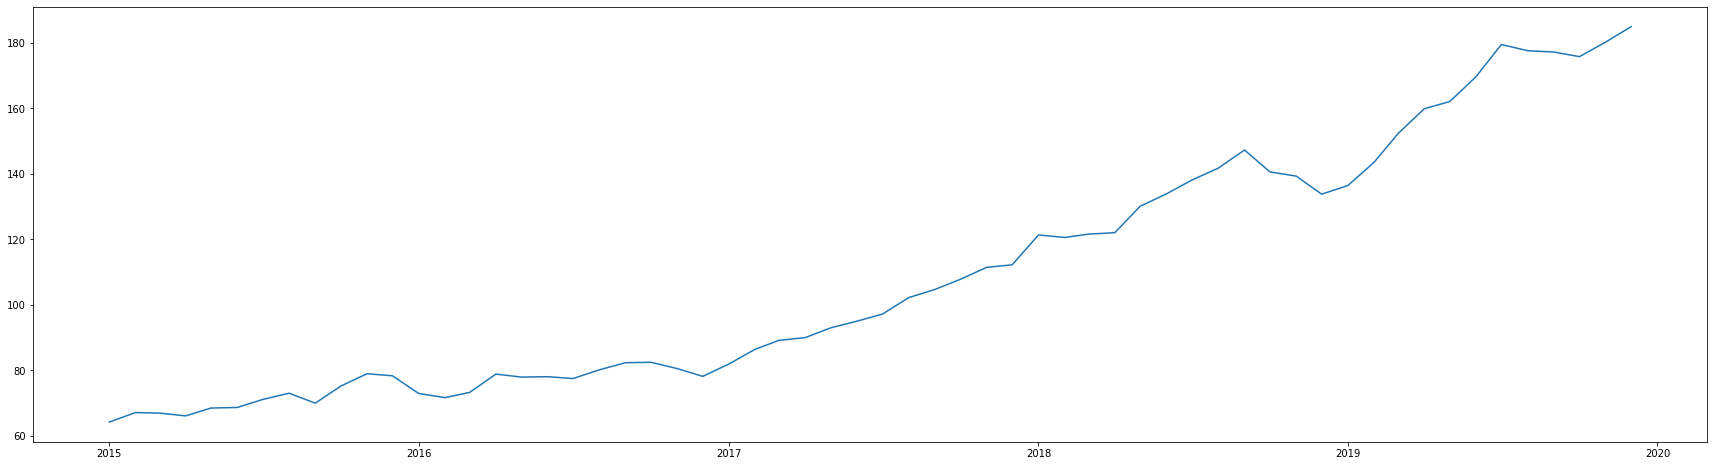

In [62]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from time import time 
# dates = pd.date_range(start='2015-01-01', end='2020-01-01', freq='MS')
# data = pd.DataFrame(columns=['values'],data=[10*math.sin(i*2*math.pi/12) + 7*math.sin(2*i*2*math.pi/12) + 3*random.random() + 20 + 2*math.sin(4.5*i*2*math.pi/12)for i in range(len(dates))], index=dates)
import random 
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

data = yf.download('V', start='2015-01-01', end='2020-01-01')

# Preprocess data
data = data[['Close']]
data = data.dropna()
data = data['Close'].resample('MS', label='left').mean()

# plot
plt.figure(figsize=(30,8))
plt.plot(data)

## AR Component

- Uses prior data to determine next outcome
- Partial Auto Correlation Function determines the direct correlation between $X_t$ and $X_{t-n}$ 
- We can analyse results from pacf to determine the AR order 

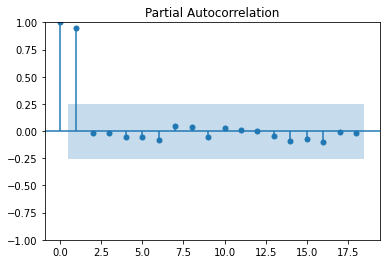

In [64]:
pacf =  plot_pacf(data, method='ywm')

In this case we would use AR-order = 1 because only the $X_{t-1}$ seem to be highly correlating with $X_t$

Another thing we can take from the pacf plot is that this stock does not seem to have seasonal tendencies, because the correlation does not increase after going below the threshold.

## MA Component
- Identifying underlaying but hard to notice tendency in the data 
- Dampening the prediction by using the direction and a weighted magnitude of the previous error(s), as a compensation for probable error in underlaying prediction
- We can analyse ACF plot to determine the order of the MA component

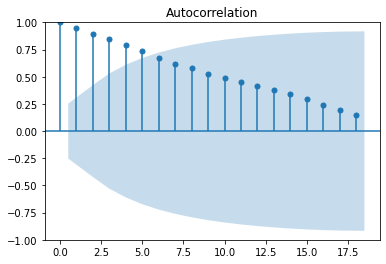

In [65]:
acf = plot_acf(data)

## I Component
- Removes any trend so that the S, AR and MA component are not disturbed by the general trend of the data
- Look at increase and decrease
- Making the data stationary (centered around 0)

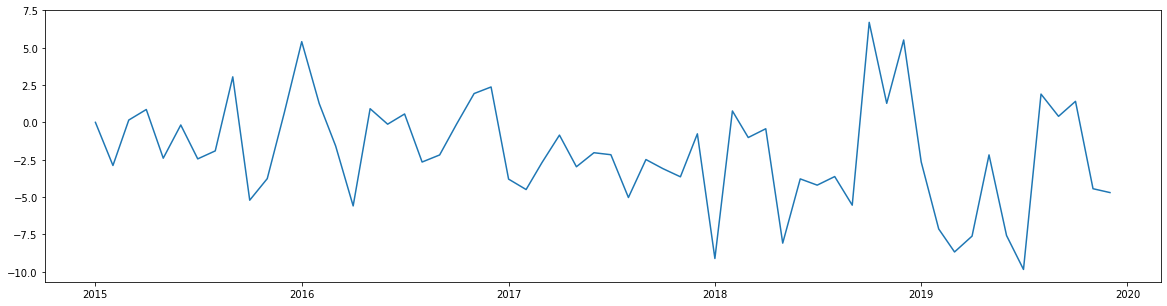

In [73]:
newdata = [0]
for i in range(1,len(data)):
    newdata.append(data[i-1]-data[i])
newdata = pd.Series(data=newdata,index=data.index)
plt.figure(figsize=(20,5))
plt.plot(newdata)

## S Component